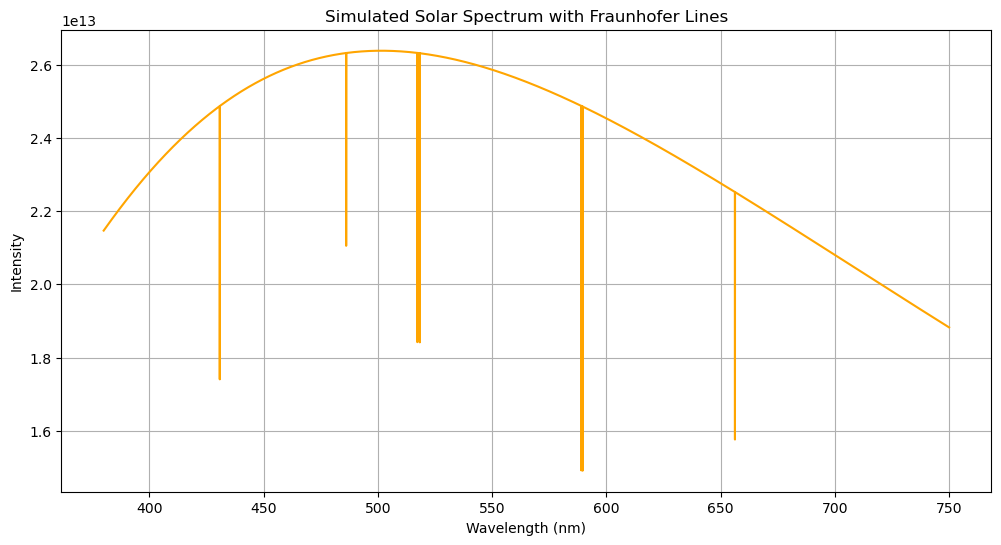

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Wavelengths in nanometers
wavelengths = np.linspace(380, 750, 10000)

# Simulate a black body spectrum for the sun
def planck(wavelength, temperature):
    h = 6.62607015e-34  # Planck constant
    c = 2.99792458e+8   # Speed of light
    k = 1.380649e-23    # Boltzmann constant
    wavelength = wavelength * 1e-9  # Convert nm to m
    intensity = (2*h*c**2) / (wavelength**5) / (np.exp(h*c/(wavelength*k*temperature)) - 1)
    return intensity

# Approximate temperature of the sun
temperature = 5778  # in Kelvin
intensity = planck(wavelengths, temperature)

# Adding Fraunhofer lines (absorption lines) at specific wavelengths
# Common Fraunhofer lines: H-alpha, H-beta, Sodium D1 & D2, Magnesium b1, b2, b3, etc.
fraunhofer_lines = {
    656.28: 0.7,  # H-alpha
    486.13: 0.8,  # H-beta
    589.0: 0.6,   # Sodium D1
    589.6: 0.6,   # Sodium D2
    517.27: 0.7,  # Magnesium b1
    518.36: 0.7,  # Magnesium b2
    430.79: 0.7   # G-band
}

for line_wavelength, depth in fraunhofer_lines.items():
    idx = np.argmin(np.abs(wavelengths - line_wavelength))
    intensity[idx] *= depth

# Plotting the solar spectrum with Fraunhofer lines
plt.figure(figsize=(12, 6))
plt.plot(wavelengths, intensity, color='orange')
plt.title('Simulated Solar Spectrum with Fraunhofer Lines')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.grid(True)
plt.savefig('spectrum_plot1.png')
plt.show()

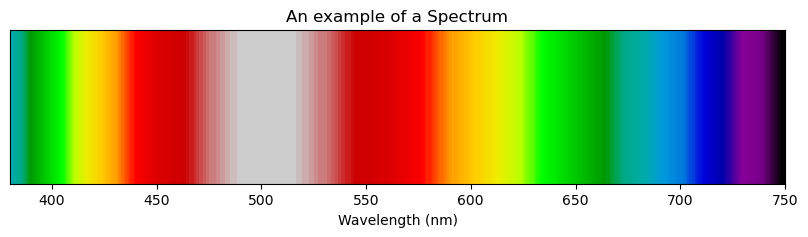

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def planck(wavelength, temperature):
    h = 6.62607004e-34  # Planck constant
    c = 3.0e+8          # Speed of light
    k = 1.38064852e-23  # Boltzmann constant
    return (2*h*c**2) / (wavelength**5) / (np.exp(h*c / (wavelength * k * temperature)) - 1)

# Create a wavelength grid
wavelengths = np.linspace(380e-9, 750e-9, 300)  # Wavelengths in meters

# Sun's temperature
temperature = 5778  # Kelvin

# Calculate the spectrum
intensity = planck(wavelengths, temperature)

# Normalize intensity
intensity /= np.max(intensity)

# Create a color map
colors = []
for wl in wavelengths:
    wl_nm = wl * 1e9  # Convert to nanometers
    colors.append(plt.cm.nipy_spectral((wl_nm - 380) / (750 - 380)))

cmap = LinearSegmentedColormap.from_list("spectrum", colors, N=len(colors))

# Create a matrix that uses the intensity values along its first axis
spectrum = np.tile(intensity, (10, 1))

# Plot the spectrum
plt.figure(figsize=(10, 2))
plt.imshow(spectrum, aspect='auto', cmap=cmap, extent=(380, 750, 0, 1))
plt.yticks([])
plt.xlabel('Wavelength (nm)')
plt.title('An example of a Spectrum')
plt.savefig('spectrum_example1.png')
plt.show()

In [3]:
# Let's first load and explore the contents of the provided SDSS dataset
import pandas as pd

# Load the dataset
file_path = 'SDSS_DR18.csv'
sdss_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure and contents
sdss_data.head()

,objid,specobjid,ra,dec,u,g,r,i,z,run,...,psfMag_g,psfMag_i,psfMag_z,expAB_u,expAB_g,expAB_r,expAB_i,expAB_z,redshift,class
0,1.240000e+18,3.240000e+17,184.950869,0.733068,18.87062,17.59612,17.11245,16.83899,16.70908,756,...,19.96352,19.25145,19.05230,0.479021,0.518483,0.520474,0.508502,0.488969,0.041691,GALAXY
1,1.240000e+18,3.250000e+17,185.729201,0.679704,19.59560,19.92153,20.34448,20.66213,20.59599,756,...,19.92417,20.65535,20.57387,0.573926,0.531728,0.403072,0.999874,0.189495,-0.000814,STAR
2,1.240000e+18,3.240000e+17,185.687690,0.823480,19.26421,17.87891,17.09593,16.65159,16.35329,756,...,19.33645,18.16669,17.78844,0.701666,0.743386,0.770897,0.778642,0.736771,0.113069,GALAXY
3,1.240000e+18,2.880000e+18,185.677904,0.768362,19.49739,17.96166,17.41269,17.20545,17.11567,756,...,17.96176,17.21564,17.12367,0.999818,0.787760,0.745611,0.399718,0.986137,0.000087,STAR
4,1.240000e+18,2.880000e+18,185.814763,0.776940,18.31519,16.83033,16.26352,16.06320,15.97527,756,...,16.85104,16.08275,15.98694,0.999795,0.834450,0.723526,0.712259,0.527055,0.000018,STAR


In [6]:
sdss_data.columns

Index(['objid', 'specobjid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run',
       'rerun', 'camcol', 'field', 'plate', 'mjd', 'fiberid', 'petroRad_u',
       'petroRad_g', 'petroRad_i', 'petroRad_r', 'petroRad_z', 'petroFlux_u',
       'petroFlux_g', 'petroFlux_i', 'petroFlux_r', 'petroFlux_z',
       'petroR50_u', 'petroR50_g', 'petroR50_i', 'petroR50_r', 'petroR50_z',
       'psfMag_u', 'psfMag_r', 'psfMag_g', 'psfMag_i', 'psfMag_z', 'expAB_u',
       'expAB_g', 'expAB_r', 'expAB_i', 'expAB_z', 'redshift', 'class'],
      dtype='object')

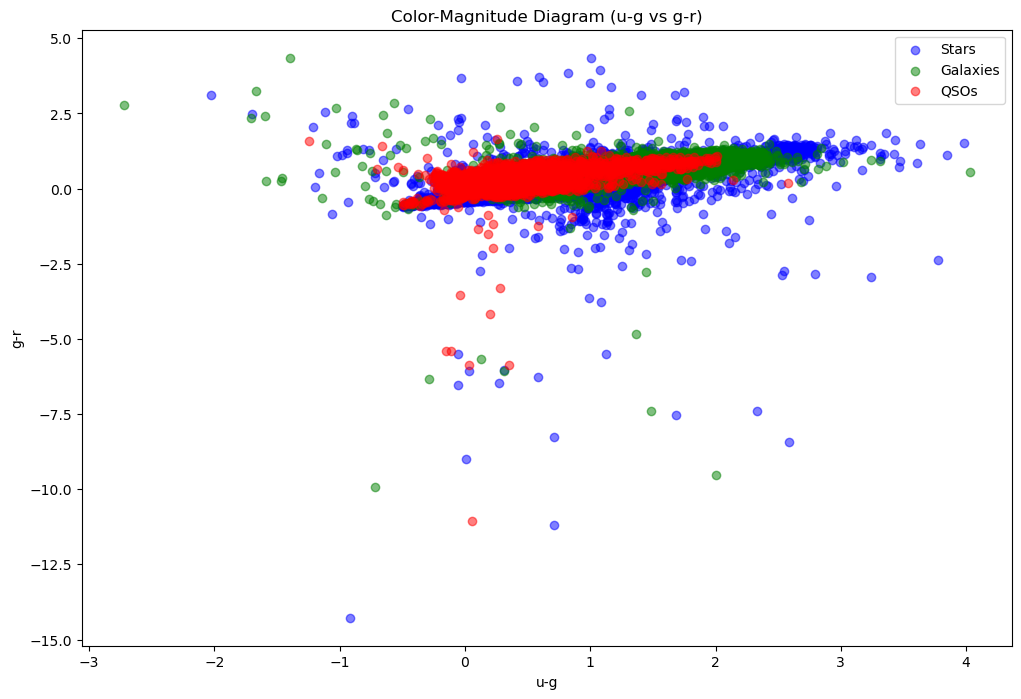

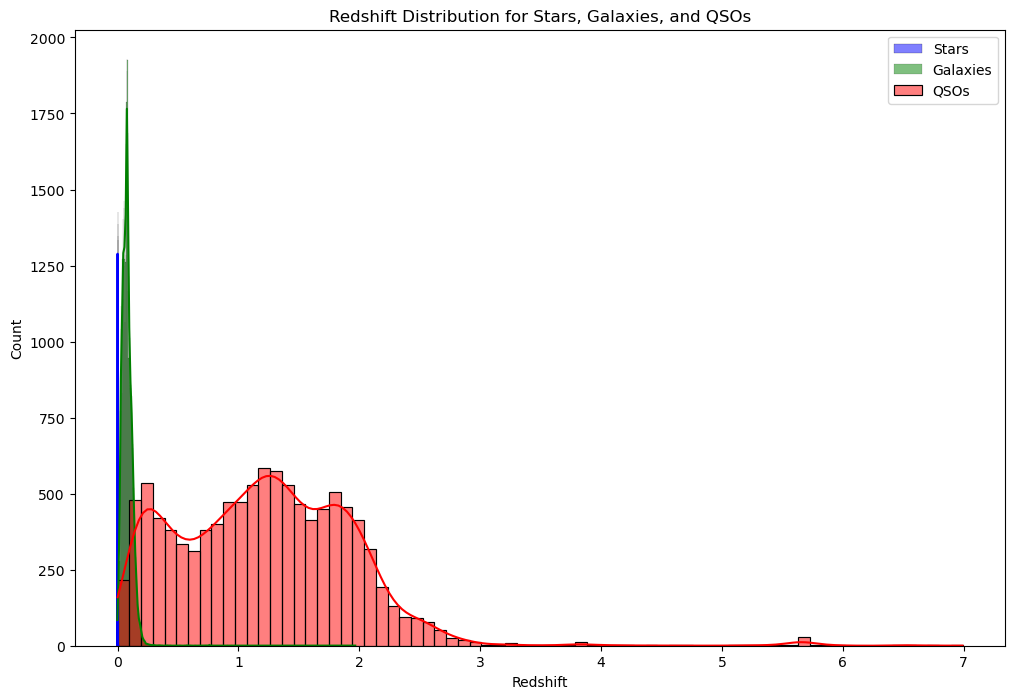

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset into stars, galaxies, and QSOs
stars = sdss_data[sdss_data['class'] == 'STAR']
galaxies = sdss_data[sdss_data['class'] == 'GALAXY']
qsos = sdss_data[sdss_data['class'] == 'QSO']

# Color-magnitude diagram (u-g vs g-r)
plt.figure(figsize=(12, 8))
plt.scatter(stars['u'] - stars['g'], stars['g'] - stars['r'], color='blue', alpha=0.5, label='Stars')
plt.scatter(galaxies['u'] - galaxies['g'], galaxies['g'] - galaxies['r'], color='green', alpha=0.5, label='Galaxies')
plt.scatter(qsos['u'] - qsos['g'], qsos['g'] - qsos['r'], color='red', alpha=0.5, label='QSOs')
plt.xlabel('u-g')
plt.ylabel('g-r')
plt.title('Color-Magnitude Diagram (u-g vs g-r)')
plt.legend()
plt.savefig('Ch7ColorMag1.png')
plt.show()

# Redshift histogram
plt.figure(figsize=(12, 8))
sns.histplot(stars['redshift'], color='blue', label='Stars', kde=True)
sns.histplot(galaxies['redshift'], color='green', label='Galaxies', kde=True)
sns.histplot(qsos['redshift'], color='red', label='QSOs', kde=True)
plt.xlabel('Redshift')
plt.ylabel('Count')
plt.title('Redshift Distribution for Stars, Galaxies, and QSOs')
plt.legend()
plt.savefig('Ch7RedshiftDistribution.png')
plt.show()

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_model(input_shape, num_classes):
    model = Sequential([
    Dense(128, activation='relu', input_shape=input_shape),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
    ])
    return model

# Assuming we have 10 features in the SDSS dataset and 3 classes (Star, Galaxy, QSO)
model = create_model((10,), 3)
model.summary()

2024-01-06 19:38:57.487439: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-06 19:38:57.532472: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-06 19:38:57.532500: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-06 19:38:57.533314: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-06 19:38:57.537635: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-06 19:38:57.537956: I tensorflow/core/platform/cpu_feature_guard.cc:1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1408      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1

625/625 [==============================] - 1s 2ms/step


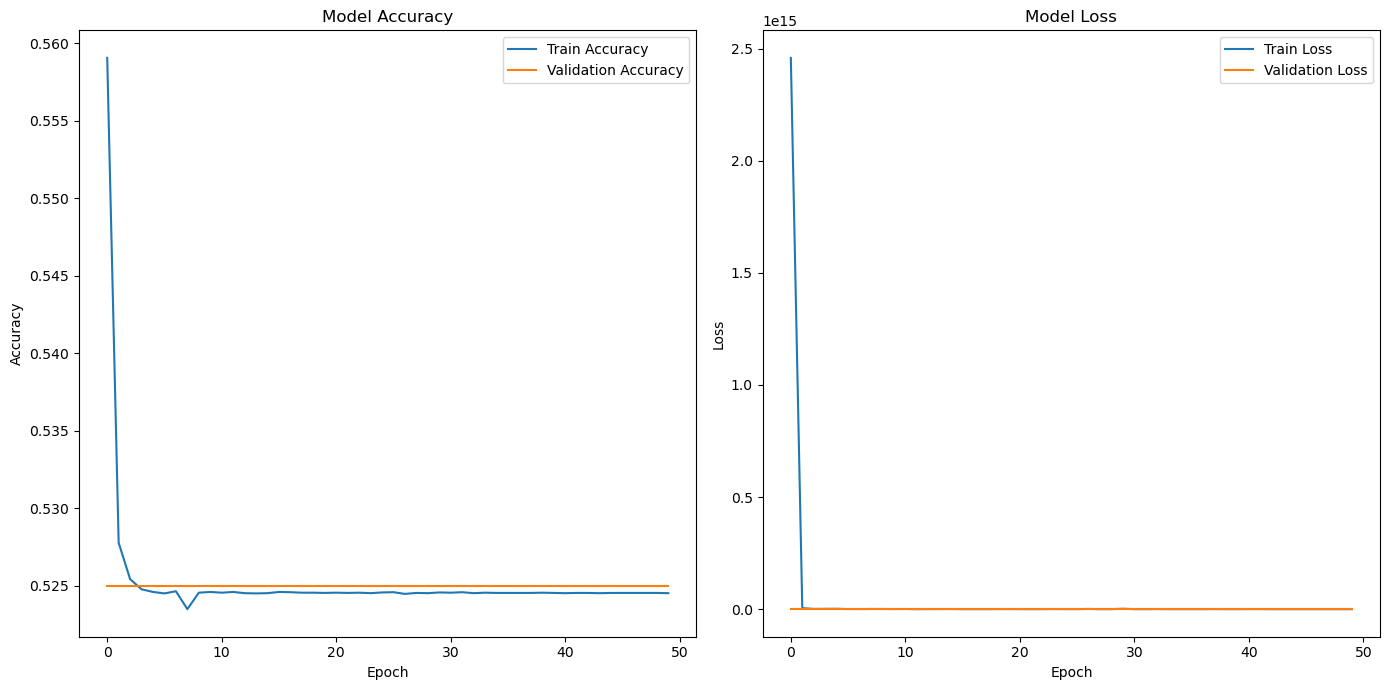

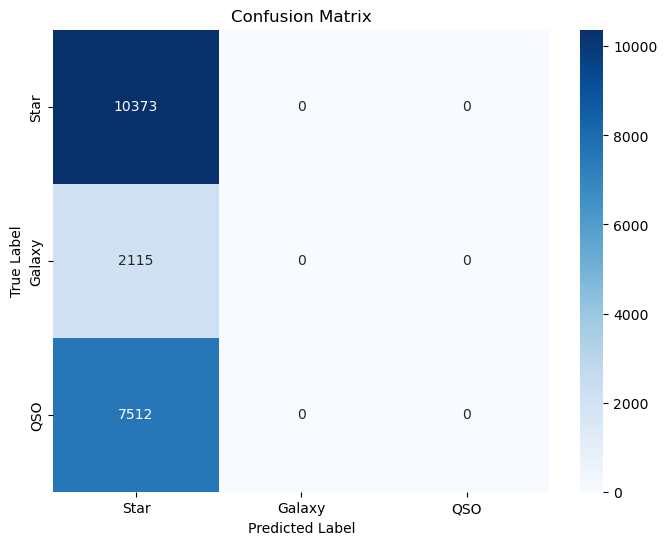

In [12]:
# Re-importing necessary packages and reloading the dataset due to execution state reset
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'SDSS_DR18.csv'
sdss_data = pd.read_csv(file_path)

# Assuming 'class' column is the target variable and the first 10 columns are features
X = sdss_data.iloc[:, :10].values
y = sdss_data['class'].astype('category').cat.codes.values

# Convert labels to categorical (one-hot encoding)
y_categorical = to_categorical(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Create the model
def create_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Assuming we have 10 features in the SDSS dataset and 3 classes (Star, Galaxy, QSO)
model = create_model((10,), 3)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

# Evaluate the model on test data
evaluation = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
predictions = model.predict(X_test)

# We now have the 'evaluation' which gives us the model performance and
# 'predictions' which gives us the predicted class probabilities for the test set.

# Let's plot the training history
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Now let's plot the confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Get the class with the highest probability for each sample
y_pred = np.argmax(predictions, axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Star', 'Galaxy', 'QSO'], yticklabels=['Star', 'Galaxy', 'QSO'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


<Axes: xlabel='class'>

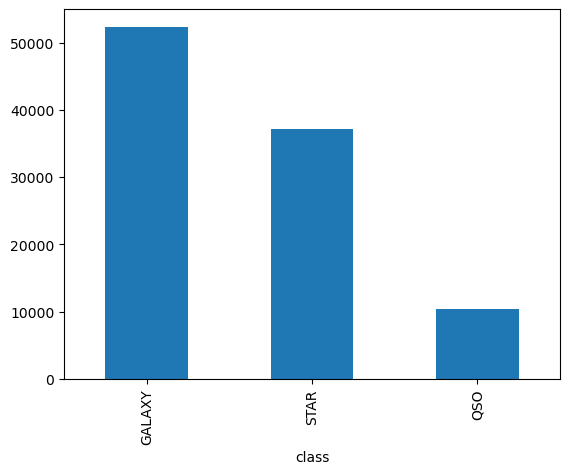

In [13]:
sdss_data['class'].value_counts().plot(kind='bar')

In [4]:
# Importing the necessary libraries for visualization
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import plot_model

# Function to create the Sequential model
def create_model(input_shape, num_classes):
    model = Sequential([
        Dense(128, activation='relu', input_shape=input_shape),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.2),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Creating the model
model = create_model((10,), 3)

# Generating the plot for the model
plot_model(model, to_file='model_visualization.png', show_shapes=True, show_layer_names=True)

# This will save the visualization to a file. Let's display the image as well.
#'/mnt/data/model_visualization.png'


2024-01-06 20:22:14.285480: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-06 20:22:14.353017: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-06 20:22:14.353053: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-06 20:22:14.354219: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-06 20:22:14.366587: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-06 20:22:14.367879: I tensorflow/core/platform/cpu_feature_guard.cc:1

AttributeError: module 'pydot' has no attribute 'InvocationException'